Importing the Basic Libraries 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb
import lightgbm as lgb
import catboost as cat
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
import optuna 
import missingno as msno

Importing the EWQI data

In [2]:
ewqi_data = pd.read_csv('./quality_estimate_and_entropy_wqi.csv')
ewqi_data.head()

,PH,EC,TDS,ALK,TH,F,CL,NO3,SO4,CA,MG,qi_wi,EWQI,EWQI_CLASSIF
0,83.333333,1696.666667,341.0,608.333333,150.000000,186.666667,383.6,53.333333,138.4,106.666667,200.000000,307.655924,307.655924,Unsuitable
1,82.000000,4736.666667,952.1,691.666667,433.333333,442.666667,1349.2,3555.555556,516.0,240.000000,690.000000,1274.533598,1274.533598,Unsuitable
2,78.000000,228.333333,45.9,208.333333,73.333333,29.333333,20.0,4.444444,0.8,69.333333,73.333333,59.095708,59.095708,Poor
3,79.333333,3553.333333,714.2,675.000000,266.666667,746.666667,994.0,71.111111,177.2,186.666667,363.333333,636.424848,636.424848,Unsuitable
4,68.666667,433.333333,87.1,208.333333,93.333333,33.333333,34.0,511.111111,68.4,85.333333,96.666667,151.448314,151.448314,Unsuitable


# EDA 

In [3]:
ewqi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2764 entries, 0 to 2763
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PH            2764 non-null   float64
 1   EC            2764 non-null   float64
 2   TDS           2764 non-null   float64
 3   ALK           2764 non-null   float64
 4   TH            2764 non-null   float64
 5   F             2764 non-null   float64
 6   CL            2764 non-null   float64
 7   NO3           2764 non-null   float64
 8   SO4           2764 non-null   float64
 9   CA            2764 non-null   float64
 10  MG            2764 non-null   float64
 11  qi_wi         2764 non-null   float64
 12  EWQI          2764 non-null   float64
 13  EWQI_CLASSIF  2764 non-null   object 
dtypes: float64(13), object(1)
memory usage: 302.4+ KB


In [4]:
ewqi_data.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
PH,2764.000000,77.088929,1003.477830,-52.000000,43.333333,59.333333,74.666667,52800.000000
EC,2764.000000,691.771829,786.499639,0.000000,263.666667,432.333333,811.916667,8860.000000
TDS,2764.000000,139.058890,158.057314,13.869000,52.997000,86.899000,163.100000,1780.860000
ALK,2764.000000,249.074668,144.016945,20.000000,158.333333,216.666667,300.000000,2050.000000
TH,2764.000000,172.922425,180.988817,16.666667,80.000000,116.666667,190.833333,1916.666667
F,2764.000000,55.839363,59.655516,0.000000,23.333333,38.666667,66.666667,746.666667
CL,2764.000000,169.328499,295.750399,2.800000,31.200000,68.000000,181.600000,3686.800000
NO3,2764.000000,109.682771,173.048325,0.000000,21.944444,57.777778,133.333333,3555.555556
SO4,2764.000000,48.561337,73.460967,0.000000,11.200000,24.800000,54.800000,996.000000
CA,2764.000000,127.487533,140.156738,5.333333,58.666667,85.333333,138.666667,2453.333333


checking for the null values 

In [5]:
ewqi_data.isnull().sum()

PH              0
EC              0
TDS             0
ALK             0
TH              0
F               0
CL              0
NO3             0
SO4             0
CA              0
MG              0
qi_wi           0
EWQI            0
EWQI_CLASSIF    0
dtype: int64

<Axes: >

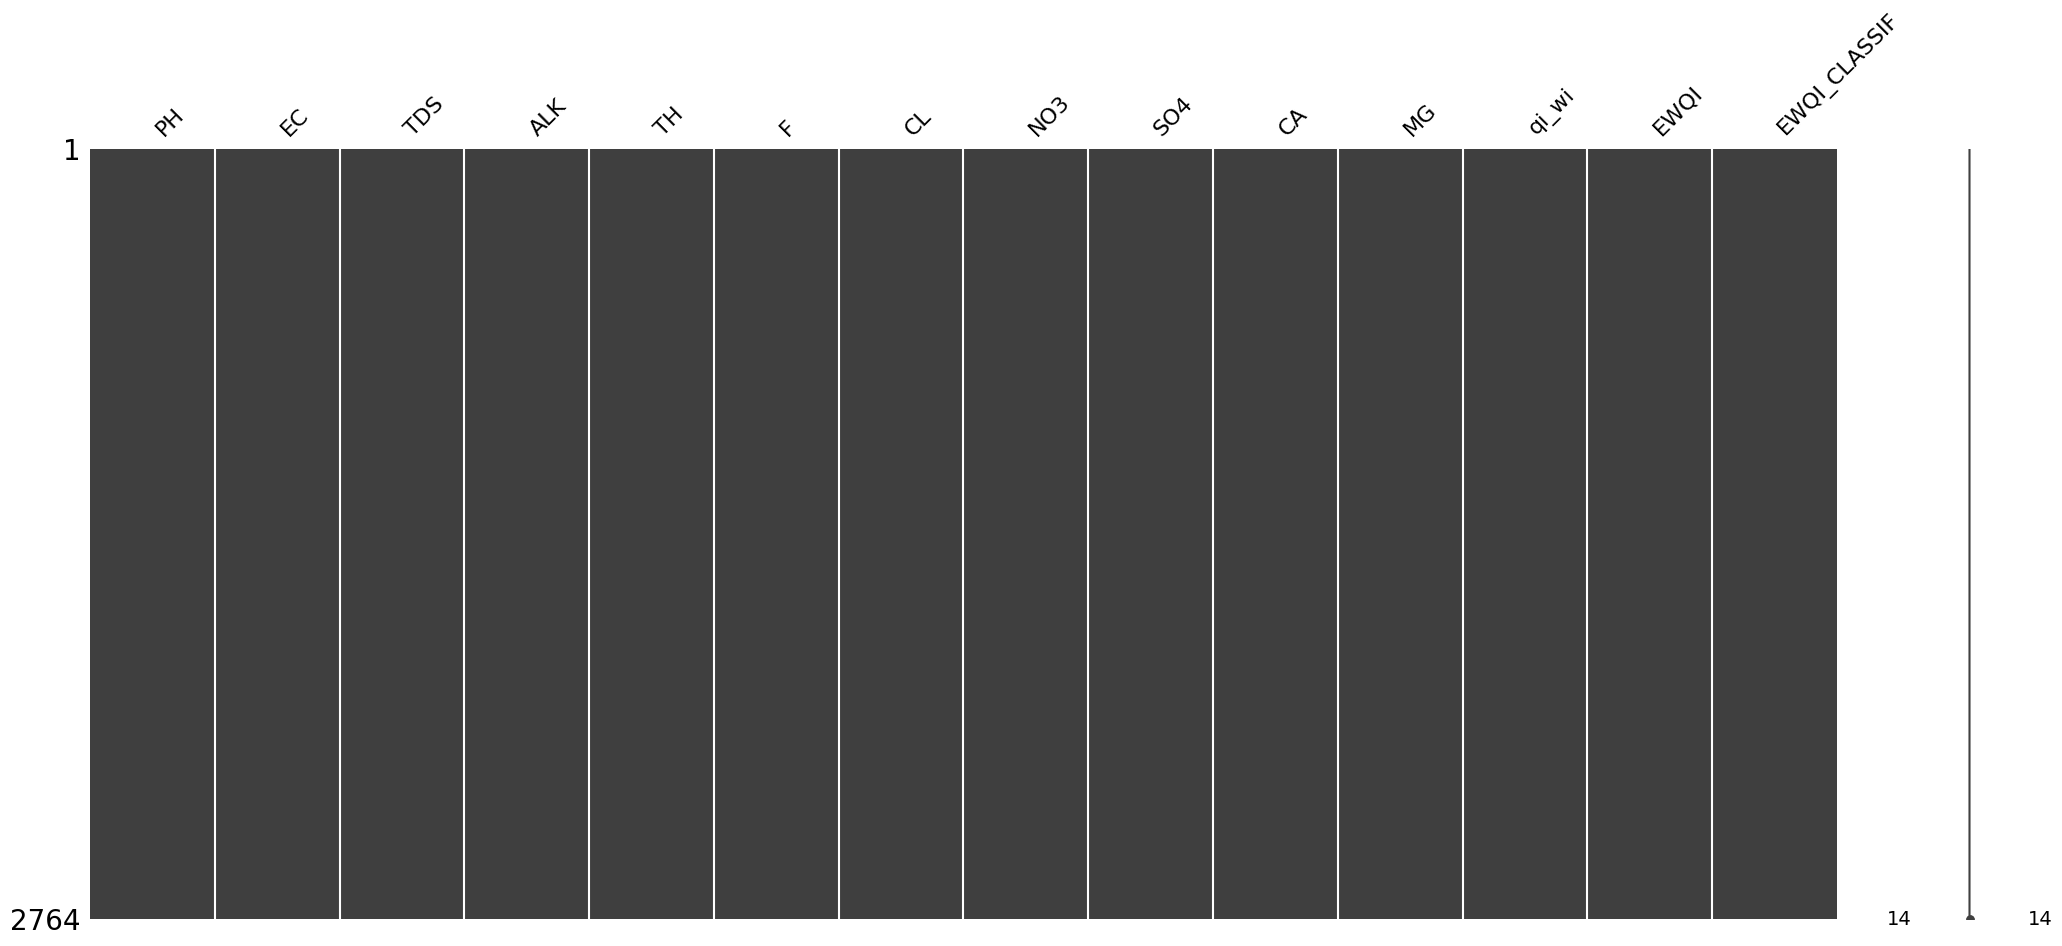

In [6]:
msno.matrix(ewqi_data)

No null values 

Checking for the duplicate data 

In [7]:
ewqi_data.duplicated().sum()

4

In [8]:
duplicated_rows = ewqi_data[ewqi_data.duplicated()]
print(duplicated_rows)

             PH          EC     TDS         ALK          TH          F    CL  \
463   59.333333  432.333333  86.899  216.666667  116.666667  38.666667  68.0   
662   59.333333  432.333333  86.899  216.666667  116.666667  38.666667  68.0   
1066  59.333333  432.333333  86.899  216.666667  116.666667  38.666667  68.0   
1079  59.333333  432.333333  86.899  216.666667  116.666667  38.666667  68.0   

            NO3   SO4         CA          MG       qi_wi        EWQI  \
463   57.777778  24.8  85.333333  136.666667  101.455151  101.455151   
662   57.777778  24.8  85.333333  136.666667  101.455151  101.455151   
1066  57.777778  24.8  85.333333  136.666667  101.455151  101.455151   
1079  57.777778  24.8  85.333333  136.666667  101.455151  101.455151   

     EWQI_CLASSIF  
463    Unsuitable  
662    Unsuitable  
1066   Unsuitable  
1079   Unsuitable  


In [9]:
ewqi_data.drop_duplicates(inplace=True)

In [10]:
ewqi_data.duplicated().sum()

0

In [11]:
import statsmodels.api as sm

X = ewqi_data.drop(['EWQI','EWQI_CLASSIF','qi_wi'], axis=1)
y = ewqi_data['EWQI_CLASSIF']

Checking for the class ratio

In [12]:
y.value_counts()

EWQI_CLASSIF
Unsuitable    1545
Poor           541
Very Poor      478
Good           195
Excellent        1
Name: count, dtype: int64

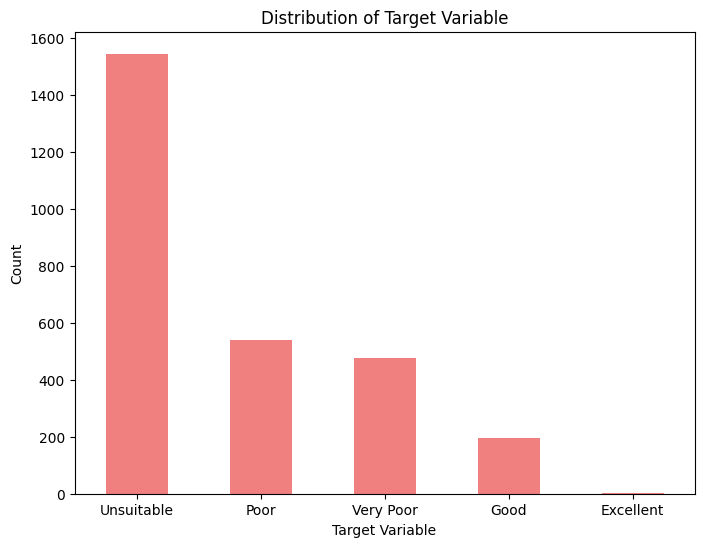

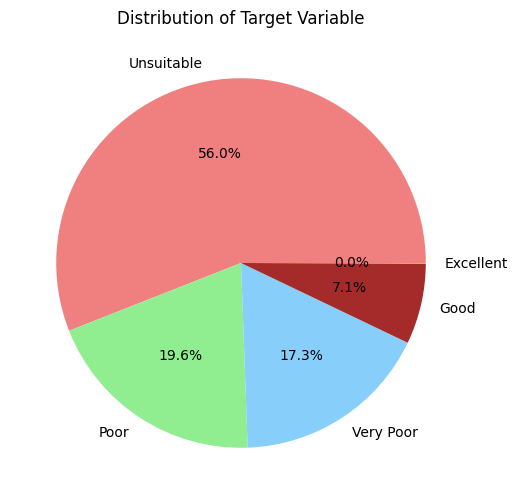

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Define class labels
class_labels = ['Unsuitable', 'Poor', 'Very Poor', 'Good', 'Excellent']

# Bar graph for target variable
plt.figure(figsize=(8, 6))
y.value_counts().plot(kind='bar', color='lightcoral')
plt.title('Distribution of Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.gca().set_xticklabels(class_labels)  # Set class labels
plt.show()

# Pie plot for target variable
plt.figure(figsize=(8, 6))
y.value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightgreen', 'lightskyblue', 'brown', 'yellow'], labels=class_labels)
plt.title('Distribution of Target Variable')
plt.ylabel('')
plt.show()

In [14]:
# Find the index of the rare class
rare_class_index = y[y == 'Excellent'].index

# Replace the rare class with the similar class
y.loc[rare_class_index] = 'Good'

# Check the updated distribution of classes
y.value_counts()


C:\Users\Smit Raval\AppData\Local\Temp\ipykernel_31100\3792524791.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[rare_class_index] = 'Good'


EWQI_CLASSIF
Unsuitable    1545
Poor           541
Very Poor      478
Good           196
Name: count, dtype: int64

Checking for the skewness in the data 

In [15]:
X.columns

Index(['PH', 'EC', 'TDS', 'ALK', 'TH', 'F', 'CL', 'NO3', 'SO4', 'CA', 'MG'], dtype='object')

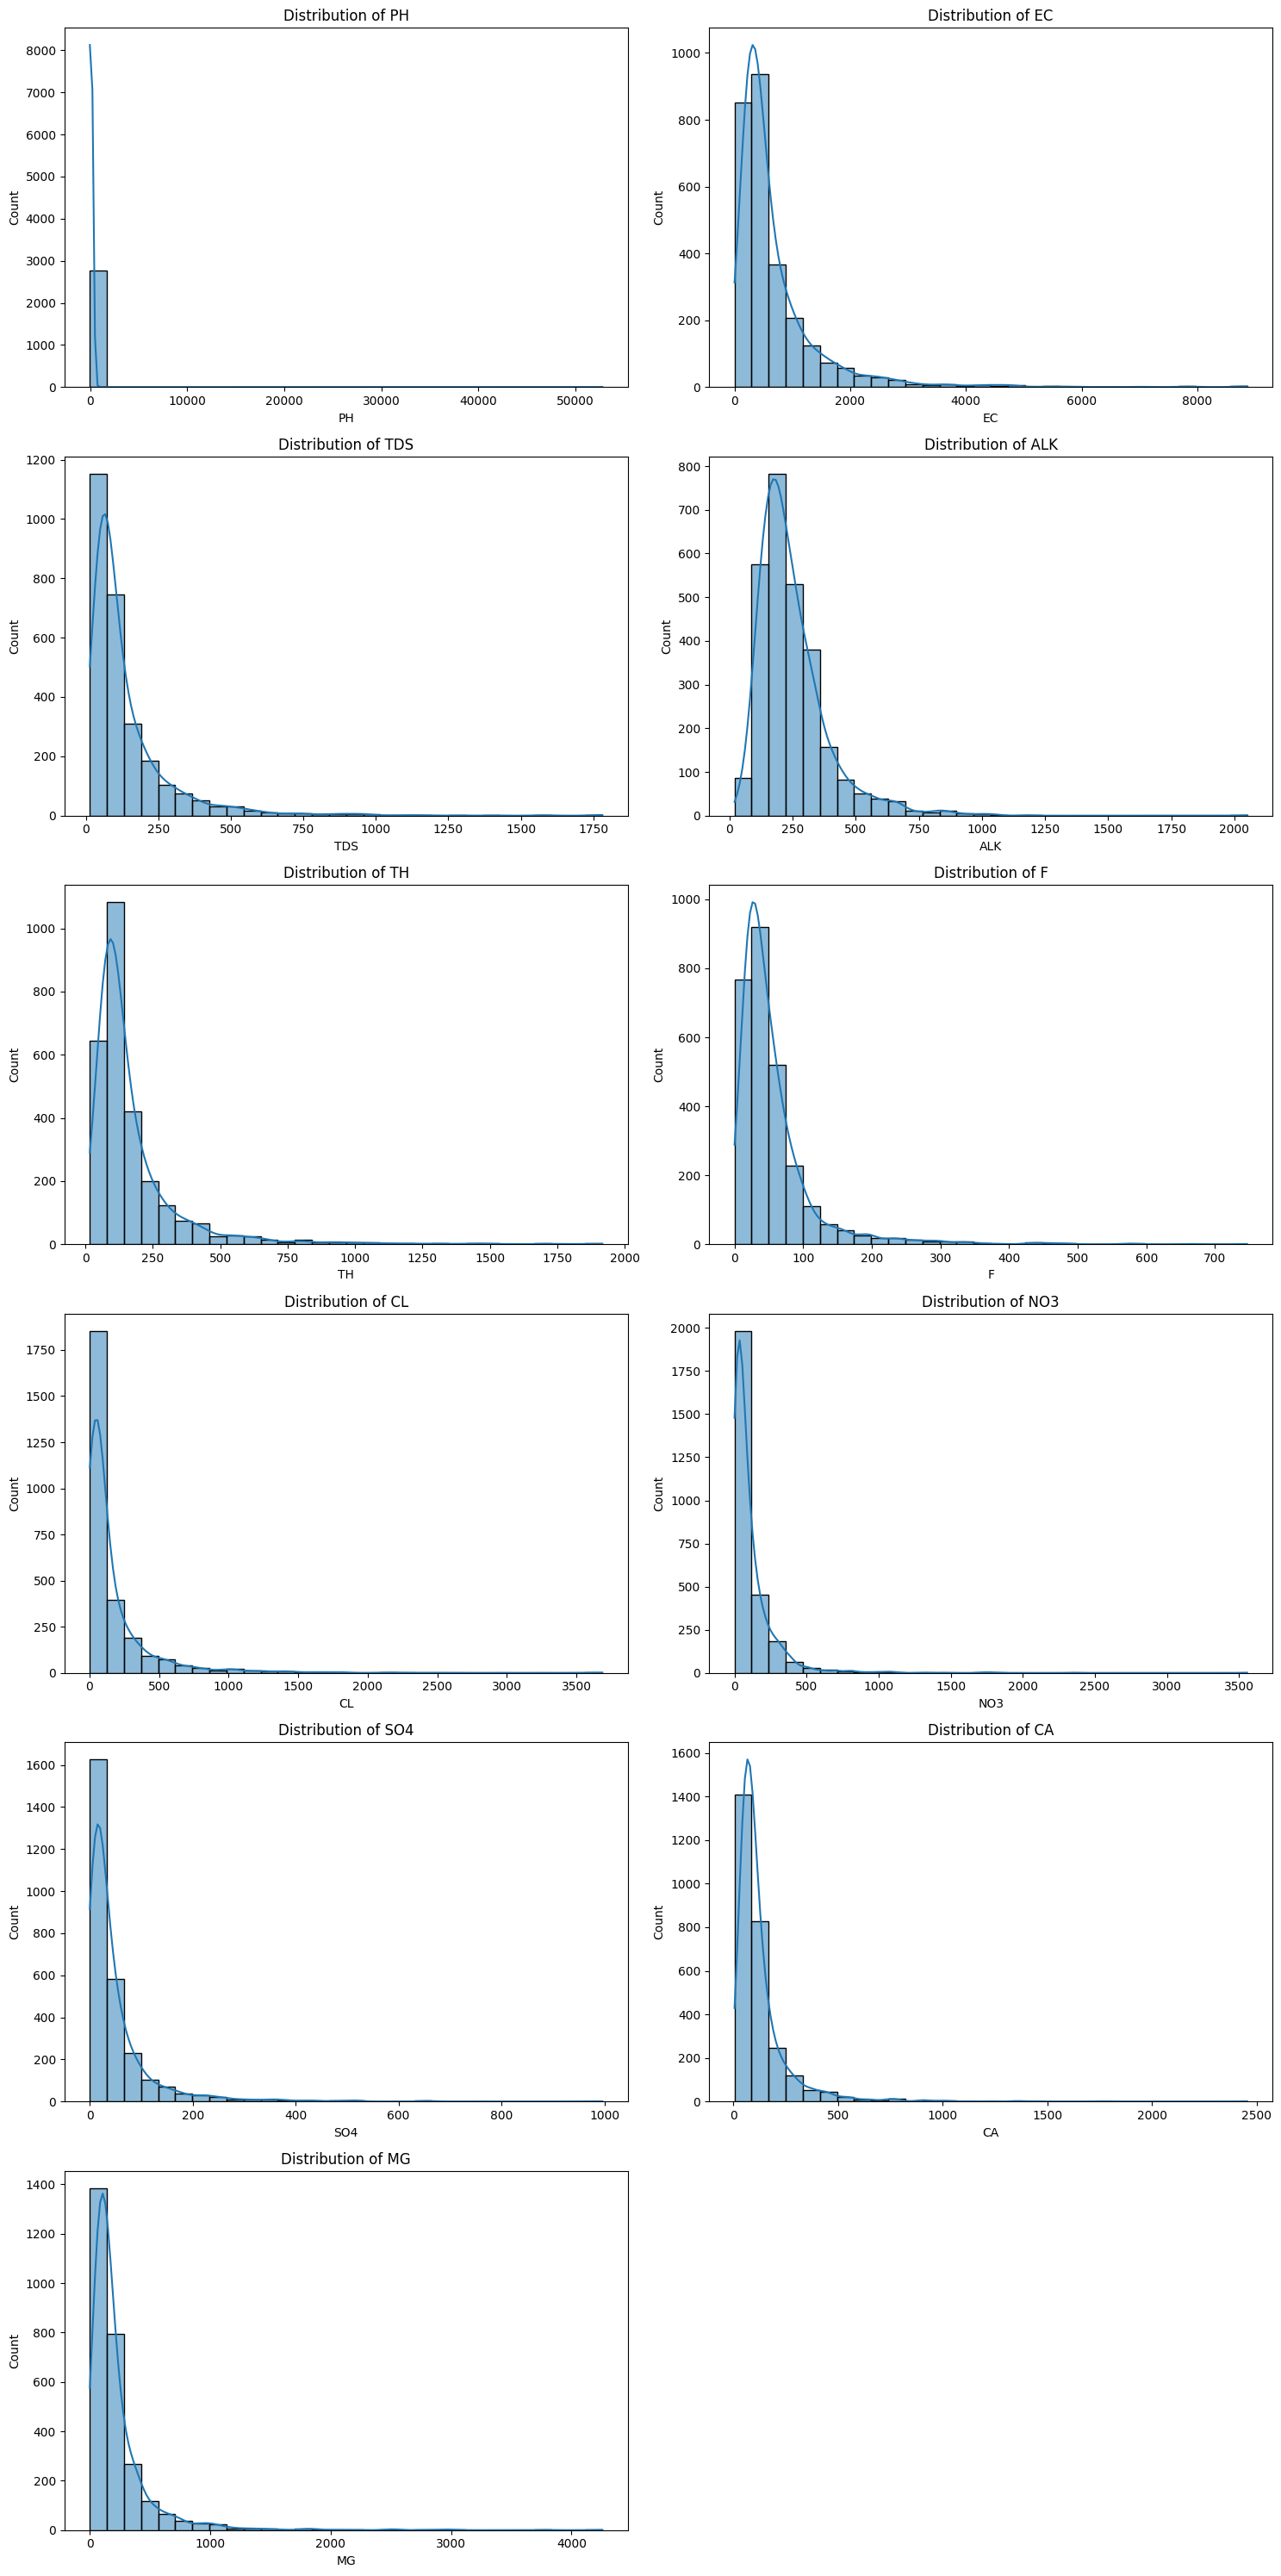

In [16]:
numerical_columns = ['PH', 'EC', 'TDS', 'ALK', 'TH', 'F', 'CL', 'NO3', 'SO4', 'CA', 'MG']

# rows of sub plots 
num_rows = len(numerical_columns) // 2 + len(numerical_columns) % 2

plt.figure(figsize=(15, 5 * num_rows))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 2, i)
    sns.histplot(X[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

C:\Users\Smit Raval\AppData\Local\Temp\ipykernel_31100\1329100955.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skewness.index, y=skewness.values, palette='viridis')


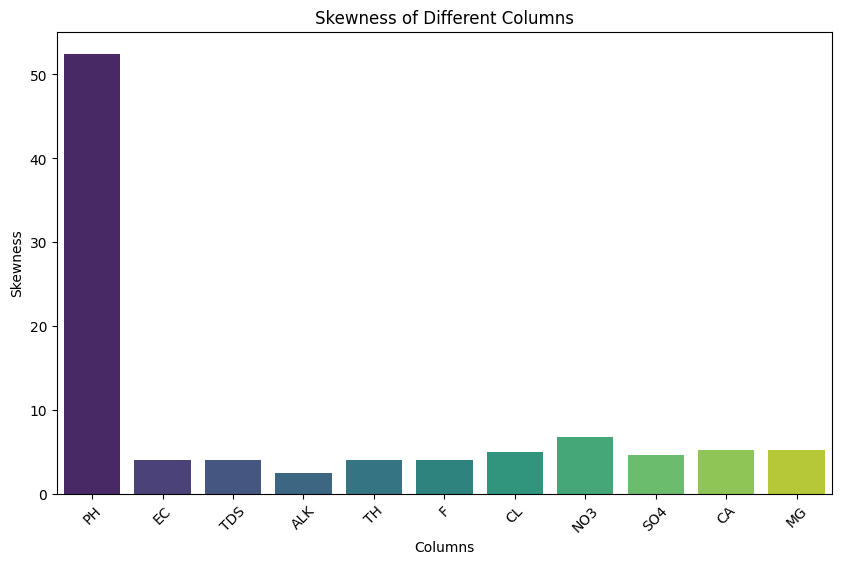

In [17]:
# Calculate skewness of each column
skewness = X.skew()

# Plot skewness of different columns in one graph
plt.figure(figsize=(10, 6))
sns.barplot(x=skewness.index, y=skewness.values, palette='viridis')
plt.title('Skewness of Different Columns')
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [18]:
X.skew().sort_values(ascending=False)

PH     52.492040
NO3     6.697375
MG      5.237448
CA      5.223159
CL      4.989499
SO4     4.652256
TDS     4.014474
EC      4.012070
TH      4.007648
F       3.990554
ALK     2.453091
dtype: float64

Removing the skewness in the data using the boxcox method as the value for the skewness in the ph column is very high around 50 

In [19]:
import pandas as pd
from scipy import stats

# Assuming numerical_columns is a list of numerical column names in your DataFrame X

for col in numerical_columns:
    # Add a constant to make all values positive
    constant = abs(X[col].min()) + 1  # Adding 1 to ensure all values are positive
    transformed_data, _ = stats.boxcox(X[col] + constant)
    X[col] = transformed_data

# Print DataFrame after transformation
print("DataFrame after Box-Cox transformation:")
print(X)

DataFrame after Box-Cox transformation:
            PH        EC       TDS       ALK        TH         F        CL  \
0     4.502892  6.276852  2.051513  4.413323  1.834351  6.465546  3.666798   
1     4.494664  6.983361  2.107505  4.468108  1.893342  7.804503  4.053162   
2     4.469463  4.796782  1.862717  3.935340  1.780169  3.909695  2.419967   
3     4.477951  6.788949  2.094166  4.457749  1.869460  8.661556  3.966877   
4     4.407419  5.284164  1.934353  3.935340  1.799644  4.072140  2.671969   
...        ...       ...       ...       ...       ...       ...       ...   
2759  4.062926  4.884780  1.876135  3.701040  1.763180  2.636912  2.804473   
2760  4.255978  6.176903  2.041824  4.061966  1.862075  4.654084  3.701959   
2761  4.180475  5.885595  2.010824  3.897113  1.826212  4.891295  3.479403   
2762  4.012254  5.373039  1.946646  4.248306  1.827945  5.044090  2.908477   
2763  4.192554  5.286468  1.934714  3.897113  1.826212  3.552380  3.139451   

            NO3       S

In [20]:
X.skew().sort_values(ascending=False)

TDS    0.070000
CL     0.048435
F      0.036462
TH     0.025223
MG     0.014143
SO4    0.000202
NO3   -0.008483
ALK   -0.009569
CA    -0.010018
EC    -0.041761
PH    -0.344105
dtype: float64

Splitting the data into train and test set 

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

Label Encoding the Target Variable 

In [22]:
# from sklearn.preprocessing import StandardScaler

# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)

In [23]:
from sklearn.preprocessing import LabelEncoder

# Label encode categorical features in the training set
le = LabelEncoder()
y_train = le.fit_transform(y_train)

# Label encode categorical features in the test set
y_val = le.transform(y_val)

In [24]:
X_train = pd.DataFrame(X_train)
X_val = pd.DataFrame(X_val)
y_train = pd.DataFrame(y_train)
y_val = pd.DataFrame(y_val)

In [25]:
y_train.value_counts()

2    1236
1     433
3     382
0     157
Name: count, dtype: int64

In [26]:
y_val.value_counts()

2    309
1    108
3     96
0     39
Name: count, dtype: int64

# Random Forest Classifier

Hyperparameter tuning 

In [27]:
# import optuna

# def objective(trial):
    
#     # Define hyperparameters to tune
#     n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
#     max_depth = trial.suggest_int('max_depth', 3, 15)
#     min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
#     min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
#     max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])
    
#     # Create Random Forest classifier with hyperparameters
#     rf_clf = RandomForestClassifier(n_estimators=n_estimators,
#                                     max_depth=max_depth,
#                                     min_samples_split=min_samples_split,
#                                     min_samples_leaf=min_samples_leaf,
#                                     max_features=max_features,
#                                     random_state=42)
    
#     # Train the model
#     rf_clf.fit(X_train, y_train)
    
#     # Predict validation set
#     y_pred = rf_clf.predict(X_val)
    
#     # Calculate accuracy
#     accuracy = accuracy_score(y_val, y_pred)
    
#     return accuracy

# # Define study and optimize
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)

# # Get best parameters
# best_params = study.best_params
# print("Best Parameters:", best_params)

# # Train model with best parameters
# best_rf_clf = RandomForestClassifier(**best_params, random_state=42)
# best_rf_clf.fit(X_train, y_train)

# # Predict test set
# y_pred = best_rf_clf.predict(X_val)

# # Calculate accuracy
# accuracy = accuracy_score(y_val, y_pred)
# print("Accuracy:", accuracy)

# # Confusion matrix
# print("Confusion Matrix:")
# print(confusion_matrix(y_val, y_pred))

# # Classification report
# print("Classification Report:")
# print(classification_report(y_val, y_pred))

Best Parameters: {'n_estimators': 700, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}

Accuracy: 0.9637681159420289

Confusion Matrix:

[[ 39   0   0   0]

 [  2 102   0   4]

 [  0   1 306   3]

 [  0   9   1  85]]

Classification Report:

              precision    recall  f1-score   support

           1       0.95      1.00      0.97        39
           2       0.91      0.94      0.93       108
           3       1.00      0.99      0.99       310
           4       0.92      0.89      0.91        95

    accuracy                           0.96       552

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

# Reset index of X_train and y_train
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

params1 =  {'n_estimators': 700, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}

rfc_model = RandomForestClassifier(**params1, random_state=42)

# Initialize KFold with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store accuracy scores for each fold
accuracy_scores_rfc = []

# Perform cross-validation
for train_index, val_index in kf.split(X_train, y_train):
    # Split data into train and validation sets for this fold
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Fit model on the training data for this fold
    rfc_model.fit(X_train_fold, y_train_fold)
    
    # Make predictions on the validation data for this fold
    y_val_pred = rfc_model.predict(X_val_fold)
    
    # Calculate accuracy score for this fold and append to list
    accuracy = accuracy_score(y_val_fold, y_val_pred)
    accuracy_scores_rfc.append(accuracy)

# Calculate and print average accuracy score across all folds
average_accuracy_rfc = np.mean(accuracy_scores_rfc)
print("Average Accuracy:", average_accuracy_rfc)

c:\Users\Smit Raval\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Smit Raval\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Smit Raval\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Smit Raval\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.

Average Accuracy: 0.9298026903068919


# XGBoost

Hyperparameter tuning 

In [29]:
# import optuna
# from sklearn.model_selection import train_test_split
# import xgboost as xgb
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# def objective(trial):
#     # Define hyperparameters to tune
#     params = {
#         'objective': 'multi:softmax',
#         'num_class': len(np.unique(y_train)),  # Number of unique classes in the target variable
#         'eval_metric': 'merror',
#         'booster': trial.suggest_categorical('booster', ['gbtree', 'gblinear', 'dart']),
#         'lambda': trial.suggest_loguniform('lambda', 1e-8, 1.0),
#         'alpha': trial.suggest_loguniform('alpha', 1e-8, 1.0),
#         'max_depth': trial.suggest_int('max_depth', 1, 15),
#         'eta': trial.suggest_loguniform('eta', 1e-8, 1.0),
#         'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
#         'grow_policy': trial.suggest_categorical('grow_policy', ['depthwise', 'lossguide'])
#     }
    
#     # Create DMatrix for XGBoost
#     dtrain = xgb.DMatrix(X_train, label=y_train)
#     dval = xgb.DMatrix(X_val, label=y_val)
    
#     # Train the model
#     model = xgb.train(params, dtrain, evals=[(dval, 'eval')], early_stopping_rounds=10, verbose_eval=False)
    
#     # Predict validation set
#     y_pred = model.predict(dval)
    
#     # Calculate accuracy
#     accuracy = accuracy_score(y_val, y_pred)
    
#     return accuracy

# # Define study and optimize
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)

# # Get best parameters
# best_params = study.best_params
# print("Best Parameters:", best_params)

# # Train model with best parameters
# best_model = xgb.XGBClassifier(**best_params)
# best_model.fit(X_train, y_train)

# # Predict test set
# y_pred = best_model.predict(X_val)

# # Calculate accuracy
# accuracy = accuracy_score(y_val, y_pred)
# print("Accuracy:", accuracy)

# # Confusion matrix
# print("Confusion Matrix:")
# print(confusion_matrix(y_val, y_pred))

# # Classification report
# print("Classification Report:")
# print(classification_report(y_val, y_pred))

Best Parameters: {'booster': 'gbtree', 'lambda': 4.0996757817709435e-05, 'alpha': 0.001921434184814864, 'max_depth': 3, 'eta': 0.9783684415003175, 'gamma': 0.05955665353613807, 'grow_policy': 'depthwise'}

Accuracy: 0.9692028985507246

Confusion Matrix:

[[ 38   1   0   0]

 [  1 104   0   3]

 [  0   1 306   3]

 [  0   6   2  87]]

Classification Report:

              precision    recall  f1-score   support

           1       0.97      0.97      0.97        39
           2       0.93      0.96      0.95       108
           3       0.99      0.99      0.99       310
           4       0.94      0.92      0.93        95

    accuracy                           0.97       552

In [30]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# Define the steps in the pipeline
steps = [
    ('oversampler', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
]

# Create the pipeline
pipeline = Pipeline(steps)

# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Average accuracy:", np.mean(cv_scores))

Cross-validation scores: [0.91485507 0.91847826 0.94384058 0.92934783 0.94927536]
Average accuracy: 0.9311594202898551


In [31]:
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

# Reset index of X_train and y_train
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

params2 = {'booster': 'gbtree', 'lambda': 4.0996757817709435e-05, 'alpha': 0.001921434184814864, 'max_depth': 3, 'eta': 0.9783684415003175, 'gamma': 0.05955665353613807, 'grow_policy': 'depthwise'}

xgb_model = xgb.XGBClassifier(**params2)

# Initialize KFold with 5 folds
kf = KFold(n_splits=5, shuffle=True)

# Lists to store accuracy scores for each fold
accuracy_scores_xgb = []

# Perform cross-validation
for train_index, val_index in kf.split(X_train, y_train):
    # Split data into train and validation sets for this fold
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Fit model on the training data for this fold
    xgb_model.fit(X_train_fold, y_train_fold)
    
    # Make predictions on the validation data for this fold
    y_val_pred = xgb_model.predict(X_val_fold)
    
    # Calculate accuracy score for this fold and append to list
    accuracy = accuracy_score(y_val_fold, y_val_pred)
    accuracy_scores_xgb.append(accuracy)

# Calculate and print average accuracy score across all folds
average_accuracy_xgb = np.mean(accuracy_scores_xgb)
print("Average Accuracy:", average_accuracy_xgb)

Average Accuracy: 0.9497347657011522


# LightGBM

Hyperparameter tuning 

In [32]:
# import optuna
# from sklearn.model_selection import train_test_split
# import lightgbm as lgb
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# def objective(trial):
    
#     # Define hyperparameters to tune
#     params = {
#         'objective': 'multiclass',
#         'metric': 'multi_logloss',
#         'verbosity': -1,
#         'boosting_type': 'gbdt',
#         'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
#         'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
#         'num_leaves': trial.suggest_int('num_leaves', 2, 256),
#         'max_depth': trial.suggest_int('max_depth', 1, 15),
#         'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1.0),
#         'feature_fraction': trial.suggest_uniform('feature_fraction', 0.1, 1.0),
#         'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.1, 1.0),
#         'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
#         'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
#         'num_class': len(np.unique(y_train)),  # Number of unique classes in the target variable
#         'random_state': 42
#     }
    
#     # Create LightGBM classifier with hyperparameters
#     lgb_clf = lgb.LGBMClassifier(**params)
    
#     # Train the model
#     lgb_clf.fit(X_train, y_train)
    
#     # Predict validation set
#     y_pred = lgb_clf.predict(X_val)
    
#     # Calculate accuracy
#     accuracy = accuracy_score(y_val, y_pred)
    
#     return accuracy

# # Define study and optimize
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)

# # Get best parameters
# best_params = study.best_params
# print("Best Parameters:", best_params)

# # Train model with best parameters
# best_lgb_clf = lgb.LGBMClassifier(**best_params, random_state=42)
# best_lgb_clf.fit(X_train, y_train)

# # Predict test set
# y_pred = best_lgb_clf.predict(X_val)

# # Calculate accuracy
# accuracy = accuracy_score(y_val, y_pred)
# print("Accuracy:", accuracy)

# # Confusion matrix
# print("Confusion Matrix:")
# print(confusion_matrix(y_val, y_pred))

# # Classification report
# print("Classification Report:")
# print(classification_report(y_val, y_pred))

Best Parameters: {'lambda_l1': 0.0011661319863511383, 'lambda_l2': 1.6684278485022657e-07, 'num_leaves': 161, 'max_depth': 7, 'learning_rate': 0.3670916064166401, 'feature_fraction': 0.4438919262508763, 'bagging_fraction': 0.9321329525746214, 'bagging_freq': 4, 'min_child_samples': 92}

Accuracy: 0.9746376811594203

Confusion Matrix:

[[ 38   1   0   0]

 [  1 104   0   3]

 [  0   1 307   2]

 [  0   5   1  89]]

Classification Report:

              precision    recall  f1-score   support

           1       0.97      0.97      0.97        39
           2       0.94      0.96      0.95       108
           3       1.00      0.99      0.99       310
           4       0.95      0.94      0.94        95

    accuracy                           0.97       552

In [33]:
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Reset index of X_train and y_train
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

params3 = {'lambda_l1': 0.0011661319863511383, 'lambda_l2': 1.6684278485022657e-07, 'num_leaves': 161, 'max_depth': 7, 'learning_rate': 0.3670916064166401, 'feature_fraction': 0.4438919262508763, 'bagging_fraction': 0.9321329525746214, 'bagging_freq': 4, 'min_child_samples': 92}

lgb_model = lgb.LGBMClassifier(**params3)

# Initialize KFold with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store accuracy scores for each fold
accuracy_scores_lgb = []

# Perform cross-validation
for train_index, val_index in kf.split(X_train, y_train):
    # Split data into train and validation sets for this fold
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Fit model on the training data for this fold
    lgb_model.fit(X_train_fold, y_train_fold)
    
    # Make predictions on the validation data for this fold
    y_val_pred = lgb_model.predict(X_val_fold)
    
    # Calculate accuracy score for this fold and append to list
    accuracy = accuracy_score(y_val_fold, y_val_pred)
    accuracy_scores_lgb.append(accuracy)

# Calculate and print average accuracy score across all folds
average_accuracy_lgb = np.mean(accuracy_scores_lgb)
print("Average Accuracy:", average_accuracy_lgb)

[LightGBM] [Warning] feature_fraction is set=0.4438919262508763, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4438919262508763

c:\Users\Smit Raval\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Smit Raval\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)



[LightGBM] [Warning] lambda_l1 is set=0.0011661319863511383, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0011661319863511383
[LightGBM] [Warning] lambda_l2 is set=1.6684278485022657e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6684278485022657e-07
[LightGBM] [Warning] bagging_fraction is set=0.9321329525746214, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9321329525746214
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.4438919262508763, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4438919262508763
[LightGBM] [Warning] lambda_l1 is set=0.0011661319863511383, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0011661319863511383
[LightGBM] [Warning] lambda_l2 is set=1.6684278485022657e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6684278485022657e-07
[LightGBM] [Warning] bagging

c:\Users\Smit Raval\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Smit Raval\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\Smit Raval\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Smit Raval\AppData\Local\Programs\Python\Python311\Lib

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\Smit Raval\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Smit Raval\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\Smit Raval\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Smit Raval\AppData\Local\Programs\Python\Python311\Lib

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

# CatBoost 

Hyperparameter tuning 

In [34]:
# import optuna
# from sklearn.model_selection import train_test_split
# from catboost import CatBoostClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# def objective(trial):
    
#     # Define hyperparameters to tune
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=100),
#         'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
#         'max_depth': trial.suggest_int('max_depth', 3, 10),
#         'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.1, 1.0),
#         'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 10.0),
#         'random_strength': trial.suggest_float('random_strength', 0.0, 10.0),
#     }
    
#     # Create CatBoost classifier with hyperparameters
#     catboost_clf = CatBoostClassifier(**params, random_state=42, verbose=False)
    
#     # Train the model
#     catboost_clf.fit(X_train, y_train)
    
#     # Predict validation set
#     y_pred = catboost_clf.predict(X_val)
    
#     # Calculate accuracy
#     accuracy = accuracy_score(y_val, y_pred)
    
#     return accuracy

# # Define study and optimize
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)

# # Get best parameters
# best_params = study.best_params
# print("Best Parameters:", best_params)

# # Train model with best parameters
# best_catboost_clf = CatBoostClassifier(**best_params, random_state=42, verbose=False)
# best_catboost_clf.fit(X_train, y_train)

# # Predict test set
# y_pred = best_catboost_clf.predict(X_val)

# # Calculate accuracy
# accuracy = accuracy_score(y_val, y_pred)
# print("Accuracy:", accuracy)

# # Confusion matrix
# print("Confusion Matrix:")
# print(confusion_matrix(y_val, y_pred))

# # Classification report
# print("Classification Report:")
# print(classification_report(y_val, y_pred))

Best Parameters: {'n_estimators': 900, 'learning_rate': 0.04986786370169693, 'max_depth': 8, 'colsample_bylevel': 0.7204832069207197, 'bagging_temperature': 1.1242603701897533, 'random_strength': 9.166316049551888}

Accuracy: 0.9855072463768116

Confusion Matrix:

[[ 38   1   0   0]

 [  0 108   0   0]

 [  0   1 308   1]

 [  0   5   0  90]]

Classification Report:

              precision    recall  f1-score   support

           1       1.00      0.97      0.99        39
           2       0.94      1.00      0.97       108
           3       1.00      0.99      1.00       310
           4       0.99      0.95      0.97        95

    accuracy                           0.99       552

In [35]:
import catboost as cat
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

params4 = {'n_estimators': 900, 'learning_rate': 0.04986786370169693, 'max_depth': 8, 'colsample_bylevel': 0.7204832069207197, 'bagging_temperature': 1.1242603701897533, 'random_strength': 9.166316049551888}

cat_model = cat.CatBoostClassifier(**params4)

# Reset index of X_train and y_train
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# Initialize KFold with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store accuracy scores for each fold
accuracy_scores_cat = []

# Perform cross-validation
for train_index, val_index in kf.split(X_train, y_train):
    # Split data into train and validation sets for this fold
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Fit model on the training data for this fold
    cat_model.fit(X_train_fold, y_train_fold)
    
    # Make predictions on the validation data for this fold
    y_val_pred = cat_model.predict(X_val_fold)
    
    # Calculate accuracy score for this fold and append to list
    accuracy = accuracy_score(y_val_fold, y_val_pred)
    accuracy_scores_cat.append(accuracy)

# Calculate and print average accuracy score across all folds
average_accuracy_cat = np.mean(accuracy_scores_cat)
print("Average Accuracy:", average_accuracy_cat)

0:	learn: 1.3079763	total: 154ms	remaining: 2m 18s
1:	learn: 1.2407174	total: 171ms	remaining: 1m 16s
2:	learn: 1.1757754	total: 190ms	remaining: 56.8s
3:	learn: 1.1336268	total: 206ms	remaining: 46.1s
4:	learn: 1.0758373	total: 225ms	remaining: 40.2s
5:	learn: 1.0370672	total: 244ms	remaining: 36.4s
6:	learn: 0.9843886	total: 261ms	remaining: 33.3s
7:	learn: 0.9532365	total: 278ms	remaining: 31s
8:	learn: 0.9193314	total: 293ms	remaining: 29s
9:	learn: 0.8772558	total: 312ms	remaining: 27.7s
10:	learn: 0.8471551	total: 328ms	remaining: 26.5s
11:	learn: 0.8169894	total: 346ms	remaining: 25.6s
12:	learn: 0.7891122	total: 361ms	remaining: 24.6s
13:	learn: 0.7674274	total: 376ms	remaining: 23.8s
14:	learn: 0.7451286	total: 392ms	remaining: 23.1s
15:	learn: 0.7212843	total: 408ms	remaining: 22.5s
16:	learn: 0.7047427	total: 428ms	remaining: 22.2s
17:	learn: 0.6872449	total: 446ms	remaining: 21.8s
18:	learn: 0.6668829	total: 461ms	remaining: 21.4s
19:	learn: 0.6491527	total: 480ms	remaining

# Voting Classifier

In [36]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import VotingClassifier

# Assuming you have already defined and trained your individual models (model1, model2, model3, model4)

# Create voting classifier with hard voting
vc_model = VotingClassifier(estimators=[('rfc', rfc_model), ('xgb', xgb_model), ('lgb', lgb_model), ('cat', cat_model)], voting='hard')

# Fit the voting classifier on the training data
vc_model.fit(X_train, y_train)

c:\Users\Smit Raval\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Smit Raval\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.4438919262508763, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4438919262508763
[LightGBM] [Warning] lambda_l1 is set=0.0011661319863511383, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0011661319863511383
[LightGBM] [Warning] lambda_l2 is set=1.6684278485022657e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6684278485022657e-07
[LightGBM] [Warning] bagging_fraction is set=0.9321329525746214, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9321329525746214
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.4438919262508763, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4438919262508763
[LightGBM] [Warning] lambda_l1 is set=0.0011661319863511383, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0011661319863511383
[LightGBM] [Warni

VotingClassifier(estimators=[('rfc',
                              RandomForestClassifier(max_depth=15,
                                                     max_features='log2',
                                                     min_samples_split=3,
                                                     n_estimators=700,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(alpha=0.001921434184814864,
                                            base_score=None, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_catego...
                                            n_estimators=100, n_jobs=None, ...)),
                             ('lgb',
                              LGBMClassifier(bagging_fraction=0.9321329525746214,
                                             bagging_freq=4,
                                             feature_fraction=0.4438919262508763,
                                             lambda_l1=0.0011661319863511383,
                                             lambda_l2=1.6684278485022657e-07,
                                             learning_rate=0.3670916064166401,
                                             max_depth=7, min_child_samples=92,
                                             num_leaves=161)),
                             ('cat',
                              <catboost.core.CatBoostClassifier object at 0x000001B61E8FE050>)])

In [37]:
# Predict on the validation set

y_pred = vc_model.predict(X_val)

[LightGBM] [Warning] feature_fraction is set=0.4438919262508763, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4438919262508763
[LightGBM] [Warning] lambda_l1 is set=0.0011661319863511383, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0011661319863511383
[LightGBM] [Warning] lambda_l2 is set=1.6684278485022657e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6684278485022657e-07
[LightGBM] [Warning] bagging_fraction is set=0.9321329525746214, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9321329525746214
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (4, 552) + inhomogeneous part.